# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
import matplotlib.pyplot as plt
import requests
from scipy import stats as st
import numpy as np
import json
import pandas as pd
from api_keys import weather_api_key
import random
from citipy import citipy

## Generate Cities List

In [7]:
#list to hold data
cities = []
lat_long = []

#random latitude and longitudes for finding cities
lats=np.random.uniform(low=-90.0, high=90.0, size=1500)
longs=np.random.uniform(low=-180.0, high=180.0, size=1500)
lat_long = zip(lats, longs) 

# Identify nearest city for each lat, lng combination
for lat_lng in lat_long:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
        #Eliminate running into duplicate cities
        if city not in cities:
            cities.append(city)

# Print the city count 
cities_count = len(cities)
print(cities_count)
 

623


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
#URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url


city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
set_counter = 1


#response = requests.get(query_url + city).json()
#response

# Loop through the cities
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
      
        print(f"Retrieving Data for city no. {set_counter}: {city}")
        set_counter += 1
        
    except:
        print("No Matching Data")


Retrieving Data for city 1: ushuaia
Retrieving Data for city 2: puerto ayora
Retrieving Data for city 3: coihueco
Retrieving Data for city 4: thompson
Retrieving Data for city 5: dondo
Retrieving Data for city 6: mataura
Retrieving Data for city 7: port alfred
Retrieving Data for city 8: hithadhoo
No Matching Data
Retrieving Data for city 9: viana
Retrieving Data for city 10: bago
Retrieving Data for city 11: machala
No Matching Data
Retrieving Data for city 12: atuona
Retrieving Data for city 13: tasiilaq
Retrieving Data for city 14: qaanaaq
Retrieving Data for city 15: punta arenas
Retrieving Data for city 16: fortuna
Retrieving Data for city 17: jamestown
Retrieving Data for city 18: shenjiamen
No Matching Data
Retrieving Data for city 19: beira
Retrieving Data for city 20: linxia
Retrieving Data for city 21: bethel
Retrieving Data for city 22: georgetown
Retrieving Data for city 23: tuktoyaktuk
Retrieving Data for city 24: barrow
Retrieving Data for city 25: saint-philippe
Retrievi

Retrieving Data for city 204: pachino
Retrieving Data for city 205: weligama
Retrieving Data for city 206: muzhi
Retrieving Data for city 207: sungaipenuh
Retrieving Data for city 208: gayny
Retrieving Data for city 209: nome
No Matching Data
Retrieving Data for city 210: anadyr
Retrieving Data for city 211: rezina
Retrieving Data for city 212: lagoa
Retrieving Data for city 213: eureka
Retrieving Data for city 214: hofn
Retrieving Data for city 215: faanui
Retrieving Data for city 216: lebyazhye
Retrieving Data for city 217: sao filipe
Retrieving Data for city 218: mount isa
Retrieving Data for city 219: goderich
Retrieving Data for city 220: broome
Retrieving Data for city 221: yellowknife
Retrieving Data for city 222: san matias
Retrieving Data for city 223: ucluelet
Retrieving Data for city 224: dakar
Retrieving Data for city 225: luderitz
Retrieving Data for city 226: manturovo
Retrieving Data for city 227: naryan-mar
Retrieving Data for city 228: mahebourg
Retrieving Data for cit

Retrieving Data for city 405: kidal
Retrieving Data for city 406: conde
Retrieving Data for city 407: meulaboh
Retrieving Data for city 408: araouane
Retrieving Data for city 409: tiarei
No Matching Data
Retrieving Data for city 410: hovd
Retrieving Data for city 411: ndende
No Matching Data
Retrieving Data for city 412: srednekolymsk
Retrieving Data for city 413: ilhabela
Retrieving Data for city 414: hryshkivtsi
Retrieving Data for city 415: tarancon
Retrieving Data for city 416: lorengau
Retrieving Data for city 417: san rafael
Retrieving Data for city 418: amahai
Retrieving Data for city 419: mount gambier
Retrieving Data for city 420: necochea
Retrieving Data for city 421: nouadhibou
Retrieving Data for city 422: alexandria
No Matching Data
Retrieving Data for city 423: bhikangaon
Retrieving Data for city 424: barberton
Retrieving Data for city 425: great bend
Retrieving Data for city 426: chapais
No Matching Data
Retrieving Data for city 427: shaunavon
Retrieving Data for city 42

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Creating the DataFrame
weather_data_df = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness(%)" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity(%)" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp (F)" : max_temp,
                "Wind Speed (mph)" : wind_speed
})

weather_data_df.head()

,City,Cloudiness(%),Country,Date,Humidity(%),Lat,Lng,Max Temp (F),Wind Speed (mph)
0,Ushuaia,40,AR,1604209261,93,-54.80,-68.30,46.40,5.82
1,Puerto Ayora,91,EC,1604209431,94,-0.74,-90.35,69.01,7.00
2,Coihueco,7,CL,1604209432,100,-36.62,-71.83,48.20,1.52
3,Thompson,5,CA,1604209432,91,55.74,-97.86,1.40,2.24
4,Dondo,61,MZ,1604209433,65,-19.61,34.74,80.35,8.66


In [13]:
weather_data_df.to_csv("Output/weather_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [4]:
#  Get the indices of cities that have humidity over 100%.


In [5]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

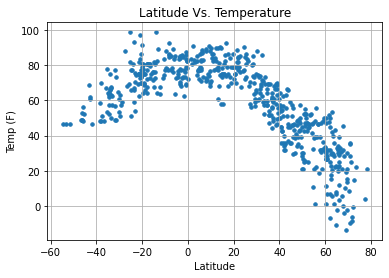

In [18]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp (F)"], marker="o", s=12)
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temp (F)")
plt.grid(True)

plt.savefig("Output/Latitude Vs. Temperature.png")
plt.show()

As the latitude increases the temperature first rises as we go close to the equator and then rapidly decreases once it crosses 40'

## Latitude vs. Humidity Plot

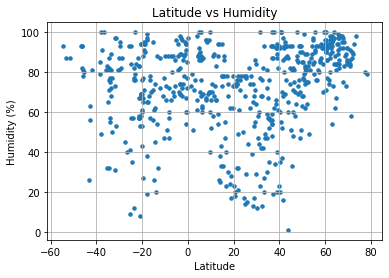

In [22]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity(%)"], marker="o", s=12)
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Output/Latitude vs Humidity.png")
plt.show()

Humidity is quite spread out but definitely the more father from equator the more humid it is. 

## Latitude vs. Cloudiness Plot

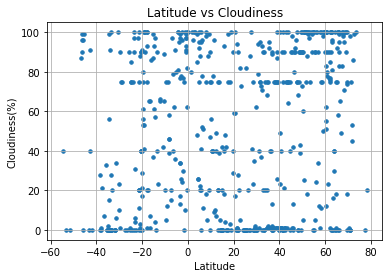

In [24]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness(%)"], marker="o", s=12)
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

plt.savefig("Output/Latitude vs Cloudiness.png")
plt.show()

Cloudiness is also spread out. Some cities away from equator witness cloudiness more than the other but overall its hard to measure. 

## Latitude vs. Wind Speed Plot

The cities close to the equator experience less wind speed than cities in southern hemisphere. 

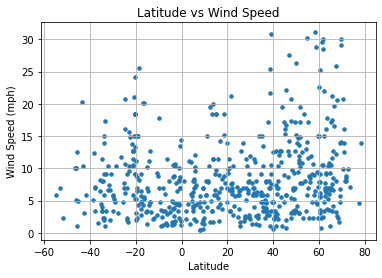

In [26]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed (mph)"], marker="o", s=12)
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Output/Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression